# Insper - Modelagem e Simulação do Mundo Físico

#### Simulção de um copo de água esfriando/aquecendo no ambiente

## Bibliotecas

In [134]:
#Importa bibliotecas necessárias
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import *

## Parâmetros do Modelo

In [135]:
# Dimensões (m)
r = 0.0305               # Recipiente (raio interno)
hr = 0.09                # Recipiente (altura)
dr = 0.002/2             # Recipiente (espessura)  (1/2)

# Áreas (m2)
As = pi*r**2             # Água (superfície)
Ap = 2*pi*r*hr           # Recipiente (paredes externas)
Ar = Ap                  # Recipiente (paredes internas)

# Volumes (m3)
va = As*hr               # Água
vr = (As+Ap)*(2*dr)      # Recipiente

# Densidades (kg/m3)
rhoa = 997               # Água
rhor = 2500              # Recipiente (vidro)

# Massas (kg)
ma = rhoa*va             # Água
mr = rhor*vr             # Recipiente (vidro)

# Calores específicos (J/(kg.K))
ca = 4180                # Água
cr = 812                 # Recipiente (vidro)

# Coeficientes de condutividade térmica (W/(m.K))
kr = 1.05                # Recipiente (vidro)

# Coeficiente de transferência convectiva (W/(m2.K))
hs = 15                  # Água para o ar
hp = 15                  # Recipiente para o ar

#Temperaturas (K)
Tar = 30.5+273.15        # Ambiente
Ta = 80+273.15           # Água
Tr = 80+273.15           # Recipiente


----
## 1° Iteração

In [136]:
# recebe temperatuas em um instante e o instante
# retorna temperatura no instante seguinte
def modelo (x, t):

    Ta = x[0]
    Tr = x[1]

    Qs = (Ta-Tar)/(1/(hs*As))
    Qr = (Ta-Tr)/(dr/(kr*Ar))
    Qp = (Tr-Tar)/((dr/(kr*Ar))+(1/(hp*Ap)))

    dTadt = (-Qs-Qr)/(ma*ca)
    dTrdt = (Qr-Qp)/(mr*cr)
    dxdt = [dTadt, dTrdt]
    
    return dxdt

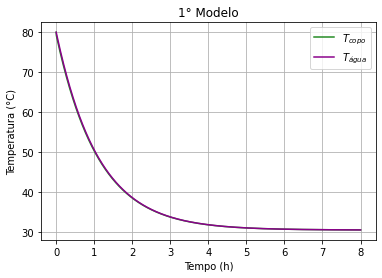

In [137]:
# Lista tempo
t_lista = np.arange(0, 28800, 1)

# Condições iniciais
x0 = [Ta, Tr]

# Resolução numérica
x = odeint(modelo, x0, t_lista)
Ta_lista = x[:,0]-273.15
Tr_lista = x[:,1]-273.15

# Variável que guarda gráfico
modelo1, ax = plt.subplots()

# Plota gráfico somente para apresentação
plt.plot(t_lista/3600, Tr_lista, 'forestgreen', label = '$T_{copo}$')
plt.plot(t_lista/3600, Ta_lista, 'darkmagenta', label = '$T_{água}$')
plt.title('1° Modelo')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tempo (h)')
plt.legend()
plt.grid(True)
plt.show()
# Cria arquivo png com o gráfico no PC
modelo1.savefig('0.modelo1.png',  format = 'png', dpi = 1200)

----
## Validação

### Dados Experimentais

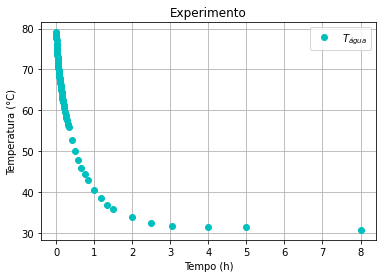

In [138]:
lista_t_exp = [5/3600 ,10/3600 ,20/3600 ,30/3600 ,40/3600 ,50/3600 ,60/3600,75/3600,90/3600,105/3600,120/3600,135/3600,150/3600,165/3600,180/3600,195/3600,210/3600,225/3600,240/3600,255/3600,270/3600,285/3600,300/3600,315/3600,330/3600,345/3600,360/3600,390/3600,420/3600,450/3600,480/3600,510/3600,540/3600,570/3600,600/3600,630/3600,660/3600,720/3600,780/3600,840/3600,900/3600,960/3600,1020/3600,1080/3600,1140/3600,1200/3600,1500/3600,1800/3600,2100/3600,2400/3600,2700/3600,3000/3600,3600/3600,4200/3600,4800/3600,5400/3600,7200/3600,9000/3600,10920/3600,14400/3600,18000/3600,28800/3600]

lista_Ta_exp = [79.1,78.8,78.3,77.6,77.1,76.3,75.9,75.3,74.7,74.0,73.5,73.0,72.5,71.9,71.4,71.1,70.8,70.3,69.9,69.5,69.4,68.9,68.5,68.1,67.8,67.5,67.1,66.6,66.1,65.6,65.0,64.5,63.9,63.3,62.8,62.5,62.0,61.2,60.5,59.6,58.8,58.1,57.5,56.7,56.4,55.8,52.8,50.1,47.8,45.8,44.4,42.8,40.5,38.5,36.9,35.7,33.8,32.3,31.7,31.5,31.4,30.7]

experimento, ax = plt.subplots()
plt.plot(lista_t_exp, lista_Ta_exp, 'co', label = '$T_{água}$')
plt.title('Experimento')
plt.xlabel('Tempo (h)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()
experimento.savefig('1.Experimento.png',  format = 'png', dpi = 1200)

### Comparação: Modelo vs Experimento

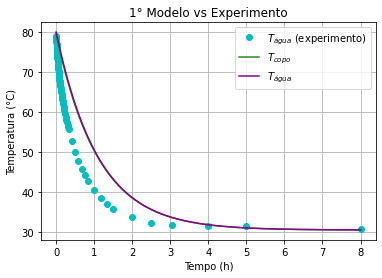

In [139]:
# Variável que guarda gráfico
validacao1, ax = plt.subplots()

# Plota gráficos
plt.plot(lista_t_exp, lista_Ta_exp, 'co', label = '$T_{água}$ (experimento)')
plt.plot(t_lista/3600, Tr_lista, 'forestgreen', label = '$T_{copo}$')
plt.plot(t_lista/3600, Ta_lista, 'darkmagenta', label = '$T_{água}$')
plt.title('1° Modelo vs Experimento')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tempo (h)')
plt.legend()
plt.grid(True)
plt.show()
# Cria arquivo png com o gráfico no PC
validacao1.savefig('2.Validação1.png',  format = 'png', dpi = 1200)

### Ajuste de parâmetros

In [140]:
# Coeficiente de transferência convectiva (W/(m2.K))
hs = 26                  # Água para o ar
hp = 26                  # Recipiente para o ar

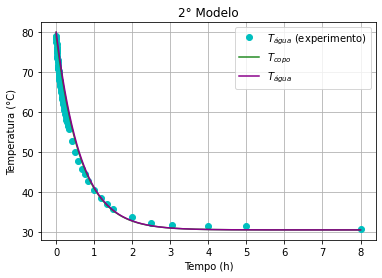

In [141]:
# Resolução numérica
x = odeint(modelo, x0, t_lista)
Ta_lista = x[:,0]-273.15
Tr_lista = x[:,1]-273.15

# Variável que guarda gráfico
validacao2, ax = plt.subplots()
# Plota gráficos
plt.plot(lista_t_exp, lista_Ta_exp, 'co', label = '$T_{água}$ (experimento)')
plt.plot(t_lista/3600, Tr_lista, 'forestgreen', label = '$T_{copo}$')
plt.plot(t_lista/3600, Ta_lista, 'darkmagenta', label = '$T_{água}$')
plt.title('2° Modelo')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tempo (h)')
plt.legend()
plt.grid(True)
plt.show()
# Cria arquivo png com o gráfico no PC
validacao2.savefig('3.Validação2.png',  format = 'png', dpi = 1200)

----
## Gráfico Comclusivo

In [142]:
# Função usada para achar tempo de equilíbrio
def T_equilibrio(lista_Ta, lista_t_h):
    if lista_Ta[0] > Tar-273.15:
        i = 0
        while lista_Ta[i] > 1.024*(Tar-273.15):
            i += 1
        return lista_t_h[i]
    else:
        i = 0
        while lista_Ta[i] < 0.9765625*(Tar-273.15):
            i += 1
        return lista_t_h[i]

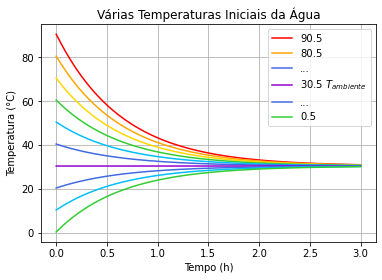

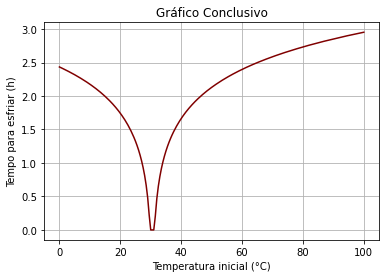

In [143]:
# Listas para gerar gráfico conclusivo
t_lista = np.arange(0, 10800, 1)
lista_t_equilibrio = []
lista_Tia = np.arange(100+273.15, -0.1+273.15, -0.5)

# Variável que guarda gráfico
arcoiris, ax = plt.subplots()

# Loop que simula a água com diferentes temperaturas inicias
i = 0
for Tia in lista_Tia:
    Tic = Tia
    TiaC = Tia-273.15
    x0 = [Tia, Tic]

    # Resolução numérica
    x = odeint(modelo, x0, t_lista)
    Ta_lista = x[:,0]-273.15
    lista_t_equilibrio.append(T_equilibrio(Ta_lista, t_lista/3600))

    # Plota gráficos
    # Controla quais temperaturas recebem legenda
    # Funciona apenas para Tia(T inicial da água) variando 0.5 em 0.5
    if i == 139:

        plt.plot(t_lista/3600, Ta_lista, 'darkviolet', label = ('30.5 $T_{ambiente}$'))
    
    elif i == 119 or i == 159:

        plt.plot(t_lista/3600, Ta_lista, 'royalblue', label = '...')

    elif i == 99 or i == 179:

        plt.plot(t_lista/3600, Ta_lista, 'deepskyblue')
        
    elif i == 199:

        plt.plot(t_lista/3600, Ta_lista, 'limegreen', label = (TiaC))

    elif i == 79:

        plt.plot(t_lista/3600, Ta_lista, 'limegreen')

    elif i == 59:

        plt.plot(t_lista/3600, Ta_lista, 'gold')

    elif i == 39:

        plt.plot(t_lista/3600, Ta_lista, 'orange', label = (TiaC))

    elif i == 19:

        plt.plot(t_lista/3600, Ta_lista, 'red', label = (TiaC))

    i += 1

# Plota gráficos
plt.title('Várias Temperaturas Iniciais da Água')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Tempo (h)')
plt.legend()
plt.grid(True)
plt.show(True)
# Cria arquivo png com o gráfico no PC
arcoiris.savefig('4.Arco íris.png',  format = 'png', dpi = 1200)

# Variável que guarda gráfico
conclusivo, ax = plt.subplots()
# Plota gráfico conclusivo
plt.plot((lista_Tia-273.15), lista_t_equilibrio, 'maroon')
plt.title('Gráfico Conclusivo')
plt.xlabel('Temperatura inicial (°C)')
plt.ylabel('Tempo para esfriar (h)')
plt.grid(True)
plt.show()
# Cria arquivo png com o gráfico no PC
conclusivo.savefig('5.Conclusivo.png',  format = 'png', dpi = 1200)
    

### Análise do Gráfico Comclusivo

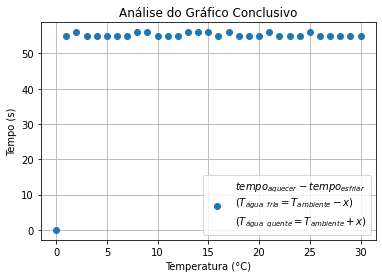

In [144]:
diferença_th = []
delta_T = []

for i in range(0, 31):
    delta_T.append(i)

# Funciona apenas para Tia(T inicial da água) variando 0.5 em 0.5
m = 0
for i in range(139, 201, 2):
    diferença_th.append((lista_t_equilibrio[i] - lista_t_equilibrio[i-m])*3600)
    # print(i, m, i-m)
    # print(lista_t_equilibrio[i])
    # print(lista_t_equilibrio[i-m])
    m += 4

aconclusivo, ax = plt.subplots()
# Plota análise do gráfico conclusivo
plt.plot(delta_T, diferença_th, 'o', label = '''$tempo_{aquecer}-tempo_{esfriar}$
($T_{água_{_{_{...}}}fria}=T_{ambiente}-x$)
($T_{água_{_{_{...}}}quente}=T_{ambiente}+x$)''')
plt.title('Análise do Gráfico Conclusivo')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Tempo (s)')
plt.legend()
plt.grid(True)
plt.show()
# Cria arquivo png com o gráfico no PC
aconclusivo.savefig('6.Analise Conclusiva.png',  format = 'png', dpi = 1200)